# **Electric Vehicle Distribution & Infrastructure Optimization**

Group - 3

Team Members: Fangzhou Zheng, Haojiang Wu, Yixi Yu, Pranaya Bindu Buyya

##**Introduction**

## **Problem Statement**

The rapid growth of electric vehicle (EV) penetration is both a challenge and a chance, predominantly in charging infrastructure planning, spatial differences in geographical adoption, and policy effectiveness. With EV sales growing by 35% (IEA, 2023), a deficit in charging facilities is the largest barrier to widescale adoption (McKinsey, 2022). Moreover, existing evidence is often poor in incorporating overall evaluation that brings together vehicle factors, geographical extent, and the impact of policies.

Our objective is to measure EV distribution patterns, identify charging demand hotspots, and assess the impact of policy stimuli. Through machine learning techniques of association rule mining and clustering, we will establish key insights that will optimize the location of charging infrastructure, facilitate policy-making choices, and enhance market strategies. The findings will provide actionable insights for energy retailers, policymakers, and auto-makers, facilitating an efficient and sustainable EV society.

## **Data Source**

**Source:** The dataset is made available for public release by the Washington Open Data Portal, providing up-to-date records of registered electric vehicles within the state.

**Dataset URL:** https://drive.google.com/file/d/1iLFacW1f3ENf4u6t4VgsW6GaeNn99za_/view?usp=drive_link   

**Data Dictionary:**

This dataset provides a comprehensive list of electric vehicles (EVs) registered in Washington State, including vehicle details, geographic location, and policy data. The data is taken from the Washington State Department of Licensing (DOL) and updated from time to time to reflect the latest EV registrations.

Dataset Size: approximately 51.7 MB

Number of Records: 22,392 rows (one for each EV registration)

Number of Attributes: 17 columns



| **Feature Name**               | **Description**                                           | **Data Type**                |
|--------------------------------|-----------------------------------------------------------|------------------------------|
| **VIN (1-10)**                 | First 10 digits of the Vehicle Identification Number      | Categorical                  |
| **County**                     | County where the EV is registered                        | Categorical                  |
| **City**                       | City of EV registration                                  | Categorical                  |
| **State**                      | State abbreviation                                       | Categorical                  |
| **Postal Code**                | ZIP code where the vehicle is registered                 | Categorical (Numeric)        |
| **Model Year**                 | Year the vehicle was manufactured                        | Numeric                      |
| **Make**                       | Vehicle manufacturer                                     | Categorical                  |
| **Model**                      | Specific model of the EV                                 | Categorical                  |
| **Electric Vehicle Type**       | EV classification (Battery or Hybrid)                   | Categorical                  |
| **CAFV Eligibility**           | Eligibility for Clean Alternative Fuel Vehicle incentives | Categorical                  |
| **Electric Range**             | Estimated driving range on a full charge (in miles)     | Numeric                      |
| **Base MSRP**                  | Manufacturer’s Suggested Retail Price                   | Numeric                      |
| **Legislative District**       | Washington legislative district                          | Categorical (Numeric)        |
| **Vehicle Location**           | Geographic coordinates (latitude & longitude)           | Categorical (Converted to Numeric) |
| **Electric Utility**           | Power provider supplying electricity to the EV owner    | Categorical                  |
| **2020 Census Tract**         | Census demographic data reference                       | Categorical (Numeric)        |


In [ ]:
#import data
import pandas as pd
import numpy as np

url = 'https://drive.google.com/uc?export=download&id=1iLFacW1f3ENf4u6t4VgsW6GaeNn99za_'
df = pd.read_csv(url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

## **Data Cleaning & Preprocessing**

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().count()

,0
VIN (1-10),223496
County,223496
City,223496
State,223496
Postal Code,223496
Model Year,223496
Make,223496
Model,223496
Electric Vehicle Type,223496
Clean Alternative Fuel Vehicle (CAFV) Eligibility,223496


In [ ]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
df['Longitude'] = df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)
df.drop(columns=['Vehicle Location'], inplace=True)

df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,PUGET SOUND ENERGY INC,5.306105e+10,-122.06402,48.01497
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.41067,47.57894
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.23825,47.49461
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,PACIFICORP,5.307700e+10,-120.53145,46.65405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,-122.27575,47.13959
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,PUGET SOUND ENERGY INC,5.306105e+10,-122.06402,48.01497
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,-122.53756,47.23165
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,-122.27575,47.13959


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223496 entries, 0 to 223994
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223496 non-null  object 
 1   County                                             223496 non-null  object 
 2   City                                               223496 non-null  object 
 3   State                                              223496 non-null  object 
 4   Postal Code                                        223496 non-null  float64
 5   Model Year                                         223496 non-null  int64  
 6   Make                                               223496 non-null  object 
 7   Model                                              223496 non-null  object 
 8   Electric Vehicle Type                              223496 non-null  object 
 9 

In [ ]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))

## **Association Rule Mining**



In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df_filtered = df[['Make', 'Model', 'Model Year', 'City', 'County']].copy()

# Ensure Model Year is numeric
df_filtered['Model Year'] = pd.to_numeric(df_filtered['Model Year'], errors='coerce')

bins = list(range(1999, 2026,2))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

df_filtered['Model Year'] = pd.cut(df_filtered['Model Year'], bins=bins, labels=labels, right=True)

df_filtered

,Make,Model,Model Year,City,County
0,JEEP,WRANGLER,2021-2022,Poulsbo,Kitsap
1,CHEVROLET,BOLT EV,2017-2018,Lake Stevens,Snohomish
2,BMW,I3,2013-2014,Seattle,King
3,TESLA,MODEL 3,2017-2018,Seattle,King
4,TESLA,MODEL S,2013-2014,Selah,Yakima
...,...,...,...,...,...
223990,TESLA,MODEL Y,2023-2024,Puyallup,Pierce
223991,BMW,I3,2019-2020,Lake Stevens,Snohomish
223992,NISSAN,LEAF,2009-2010,University Place,Pierce
223993,TESLA,MODEL 3,2023-2024,Puyallup,Pierce


In [ ]:
df_transactions = df_filtered.astype(str).values.tolist()
df_transactions

[['JEEP', 'WRANGLER', '2021-2022', 'Poulsbo', 'Kitsap'],
 ['CHEVROLET', 'BOLT EV', '2017-2018', 'Lake Stevens', 'Snohomish'],
 ['BMW', 'I3', '2013-2014', 'Seattle', 'King'],
 ['TESLA', 'MODEL 3', '2017-2018', 'Seattle', 'King'],
 ['TESLA', 'MODEL S', '2013-2014', 'Selah', 'Yakima'],
 ['JEEP', 'WRANGLER', '2019-2020', 'Bremerton', 'Kitsap'],
 ['BMW', '530E', '2017-2018', 'Lacey', 'Thurston'],
 ['TESLA', 'MODEL X', '2015-2016', 'Kent', 'King'],
 ['CHEVROLET', 'BOLT EV', '2019-2020', 'Yakima', 'Yakima'],
 ['TESLA', 'MODEL 3', '2017-2018', 'Lynnwood', 'Snohomish'],
 ['NISSAN', 'LEAF', '2015-2016', 'Lynnwood', 'Snohomish'],
 ['LEXUS', 'RZ', '2021-2022', 'Olalla', 'Kitsap'],
 ['KIA', 'EV6', '2023-2024', 'Poulsbo', 'Kitsap'],
 ['NISSAN', 'LEAF', '2019-2020', 'Suquamish', 'Kitsap'],
 ['NISSAN', 'LEAF', '2017-2018', 'Seattle', 'King'],
 ['TESLA', 'MODEL S', '2015-2016', 'Issaquah', 'King'],
 ['TESLA', 'MODEL S', '2013-2014', 'Poulsbo', 'Kitsap'],
 ['POLESTAR', 'PS2', '2019-2020', 'Oak Harbor', 

###**a) Mining the relationship between car brand and models.**

In [ ]:
df_city_model = df_filtered[['Make', 'Model']].copy()
df_transactions_make_model = df_city_model.astype(str).values.tolist()
df_transactions_make_model

[['JEEP', 'WRANGLER'],
 ['CHEVROLET', 'BOLT EV'],
 ['BMW', 'I3'],
 ['TESLA', 'MODEL 3'],
 ['TESLA', 'MODEL S'],
 ['JEEP', 'WRANGLER'],
 ['BMW', '530E'],
 ['TESLA', 'MODEL X'],
 ['CHEVROLET', 'BOLT EV'],
 ['TESLA', 'MODEL 3'],
 ['NISSAN', 'LEAF'],
 ['LEXUS', 'RZ'],
 ['KIA', 'EV6'],
 ['NISSAN', 'LEAF'],
 ['NISSAN', 'LEAF'],
 ['TESLA', 'MODEL S'],
 ['TESLA', 'MODEL S'],
 ['POLESTAR', 'PS2'],
 ['TESLA', 'MODEL S'],
 ['HYUNDAI', 'SANTA FE'],
 ['BMW', 'I3'],
 ['TESLA', 'MODEL Y'],
 ['TESLA', 'MODEL X'],
 ['JEEP', 'WRANGLER'],
 ['BMW', '330E'],
 ['TOYOTA', 'PRIUS PRIME'],
 ['TESLA', 'MODEL 3'],
 ['RIVIAN', 'R1T'],
 ['VOLVO', 'XC60'],
 ['BMW', 'X5'],
 ['FIAT', '500'],
 ['CHEVROLET', 'BOLT EUV'],
 ['TESLA', 'MODEL Y'],
 ['TESLA', 'MODEL 3'],
 ['TESLA', 'MODEL S'],
 ['CHEVROLET', 'BOLT EV'],
 ['TESLA', 'MODEL S'],
 ['TESLA', 'MODEL 3'],
 ['TESLA', 'MODEL 3'],
 ['TESLA', 'MODEL Y'],
 ['MAZDA', 'CX-90'],
 ['MAZDA', 'CX-90'],
 ['KIA', 'NIRO'],
 ['TESLA', 'MODEL 3'],
 ['TESLA', 'MODEL 3'],
 ['TESLA'

In [ ]:
te = TransactionEncoder()
cm = te.fit(df_transactions_make_model).transform(df_transactions_make_model)
df_encoded_make_model = pd.DataFrame(cm, columns=te.columns_)


frequent_brand_model = apriori(df_encoded_make_model, min_support=0.001, use_colnames=True)

rules_brand_model = association_rules(frequent_brand_model, metric="confidence", min_threshold=0.5)

rules_brand_model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(330E),(BMW),0.002219,0.040963,0.002219,1.000000,24.412452,1.0,0.002128,inf,0.961170,0.054178,1.000000,0.527089
1,(500),(FIAT),0.003190,0.003392,0.003190,1.000000,294.849604,1.0,0.003179,inf,0.999798,0.940633,1.000000,0.970317
2,(FIAT),(500),0.003392,0.003190,0.003190,0.940633,294.849604,1.0,0.003179,16.790707,1.000000,0.940633,0.940443,0.970317
3,(530E),(BMW),0.001915,0.040963,0.001915,1.000000,24.412452,1.0,0.001837,inf,0.960877,0.046750,1.000000,0.523375
4,(A3),(AUDI),0.002479,0.018569,0.002479,1.000000,53.854458,1.0,0.002433,inf,0.983870,0.133494,1.000000,0.566747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,(SOLTERRA),(SUBARU),0.007763,0.008175,0.007763,1.000000,122.329502,1.0,0.007700,inf,0.999585,0.949644,1.000000,0.974822
101,(SUBARU),(SOLTERRA),0.008175,0.007763,0.007763,0.949644,122.329502,1.0,0.007700,19.704533,1.000000,0.949644,0.949250,0.974822
102,(XC40),(VOLVO),0.005790,0.024846,0.005790,1.000000,40.247794,1.0,0.005646,inf,0.980833,0.233027,1.000000,0.616514
103,(XC60),(VOLVO),0.006797,0.024846,0.006797,1.000000,40.247794,1.0,0.006628,inf,0.981827,0.273546,1.000000,0.636773


In [ ]:
filtered_rules = rules_brand_model[rules_brand_model['conviction'] == np.inf]
filtered_rules.sort_values(by=['lift'], ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
89,(MODEL Y),(TESLA),0.207950,0.429314,0.207950,1.0,2.329297,1.0,0.118674,inf,0.720517,0.484377,1.0,0.742189
88,(MODEL X),(TESLA),0.027871,0.429314,0.027871,1.0,2.329297,1.0,0.015905,inf,0.587047,0.064919,1.0,0.532460
87,(MODEL S),(TESLA),0.034631,0.429314,0.034631,1.0,2.329297,1.0,0.019764,inf,0.591159,0.080667,1.0,0.540334
86,(MODEL 3),(TESLA),0.153819,0.429314,0.153819,1.0,2.329297,1.0,0.087782,inf,0.674425,0.358291,1.0,0.679145
36,(CYBERTRUCK),(TESLA),0.004819,0.429314,0.004819,1.0,2.329297,1.0,0.002750,inf,0.573449,0.011225,1.0,0.505612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,(AIR),(LUCID),0.001597,0.001597,0.001597,1.0,626.039216,1.0,0.001595,inf,1.000000,1.000000,1.0,1.000000
6,(LUCID),(AIR),0.001597,0.001597,0.001597,1.0,626.039216,1.0,0.001595,inf,1.000000,1.000000,1.0,1.000000
55,(HUMMER EV SUV),(GMC),0.001007,0.001338,0.001007,1.0,747.478261,1.0,0.001005,inf,0.999669,0.752508,1.0,0.876254
71,(JAGUAR),(I-PACE),0.001043,0.001043,0.001043,1.0,959.210300,1.0,0.001041,inf,1.000000,1.000000,1.0,1.000000


**Findings:** Absolutely bound brand-model (Conviction = inf, confidence = 1.0) [Model → Brand]

These models are already the brand's masterpieces, and the brand does not need to worry too much about customers buying other brands' cars. It is suitable to continue marketing and consolidate the brand image.

In [ ]:
filtered_rules = rules_brand_model[rules_brand_model['conviction'] != np.inf]
filtered_rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
56,(GMC),(HUMMER EV SUV),0.001338,0.001007,0.001007,0.752508,747.478261,1.0,0.001005,4.036473,1.0,0.752508,0.752259,0.876254
2,(FIAT),(500),0.003392,0.003190,0.003190,0.940633,294.849604,1.0,0.003179,16.790707,1.0,0.940633,0.940443,0.970317
34,(MAZDA),(CX-90),0.004094,0.003732,0.003732,0.911475,244.257923,1.0,0.003716,11.254143,1.0,0.911475,0.911144,0.955738
23,(CADILLAC),(LYRIQ),0.004591,0.004201,0.004201,0.915205,217.832359,1.0,0.004182,11.743556,1.0,0.915205,0.914847,0.957602
84,(MITSUBISHI),(OUTLANDER),0.004761,0.004528,0.004528,0.951128,210.052632,1.0,0.004506,20.368888,1.0,0.951128,0.950906,0.975564
58,(MINI),(HARDTOP),0.004855,0.003606,0.003606,0.742857,205.987097,1.0,0.003589,3.874864,1.0,0.742857,0.741926,0.871429
91,(POLESTAR),(PS2),0.005459,0.005302,0.005302,0.971311,183.193443,1.0,0.005273,34.672327,1.0,0.971311,0.971159,0.985656
92,(PORSCHE),(TAYCAN),0.006099,0.003463,0.003463,0.567865,163.973588,1.0,0.003442,2.306078,1.0,0.567865,0.566363,0.783933
61,(HONDA),(PROLOGUE),0.008054,0.004170,0.004170,0.517778,124.164444,1.0,0.004137,2.065085,1.0,0.517778,0.515758,0.758889
101,(SUBARU),(SOLTERRA),0.008175,0.007763,0.007763,0.949644,122.329502,1.0,0.007700,19.704533,1.0,0.949644,0.949250,0.974822


**Findings:** (Conviction = inf, confidence = 1.0) [Brand → Model]

These cars have a strong relationship with the brand, but customers may have other options and are not 100% sure to buy this brand. There are competitors in the market, for example, people who buy NISSAN may not buy WRANGLER.


###**b) Mining the relationship between Model and County.**

In [ ]:
df_model_county = df_filtered[['Model', 'County']].copy()
df_transactions_model_county = df_model_county.astype(str).values.tolist()
df_transactions_model_county

[['WRANGLER', 'Kitsap'],
 ['BOLT EV', 'Snohomish'],
 ['I3', 'King'],
 ['MODEL 3', 'King'],
 ['MODEL S', 'Yakima'],
 ['WRANGLER', 'Kitsap'],
 ['530E', 'Thurston'],
 ['MODEL X', 'King'],
 ['BOLT EV', 'Yakima'],
 ['MODEL 3', 'Snohomish'],
 ['LEAF', 'Snohomish'],
 ['RZ', 'Kitsap'],
 ['EV6', 'Kitsap'],
 ['LEAF', 'Kitsap'],
 ['LEAF', 'King'],
 ['MODEL S', 'King'],
 ['MODEL S', 'Kitsap'],
 ['PS2', 'Island'],
 ['MODEL S', 'King'],
 ['SANTA FE', 'Kitsap'],
 ['I3', 'Kitsap'],
 ['MODEL Y', 'Yakima'],
 ['MODEL X', 'King'],
 ['WRANGLER', 'Kitsap'],
 ['330E', 'Kitsap'],
 ['PRIUS PRIME', 'Kitsap'],
 ['MODEL 3', 'Kitsap'],
 ['R1T', 'Thurston'],
 ['XC60', 'Thurston'],
 ['X5', 'King'],
 ['500', 'Thurston'],
 ['BOLT EUV', 'Yakima'],
 ['MODEL Y', 'Snohomish'],
 ['MODEL 3', 'King'],
 ['MODEL S', 'Kitsap'],
 ['BOLT EV', 'Kitsap'],
 ['MODEL S', 'Snohomish'],
 ['MODEL 3', 'King'],
 ['MODEL 3', 'Snohomish'],
 ['MODEL Y', 'Snohomish'],
 ['CX-90', 'Kitsap'],
 ['CX-90', 'Thurston'],
 ['NIRO', 'Snohomish'],
 ['MOD

In [ ]:
te = TransactionEncoder()
mc = te.fit(df_transactions_model_county).transform(df_transactions_model_county)
df_encoded_model_county = pd.DataFrame(mc, columns=te.columns_)


frequent_model_county = apriori(df_encoded_model_county, min_support=0.001, use_colnames=True)

rules_model_county = association_rules(frequent_model_county, metric="lift", min_threshold= 1)


In [ ]:
rules_model_county.sort_values(by=["support", "confidence"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
80,(MODEL Y),(King),0.207950,0.506291,0.114168,0.549015,1.084385,1.0,0.008884,1.094734,0.098250,0.190256,0.086536,0.387256
81,(King),(MODEL Y),0.506291,0.207950,0.114168,0.225498,1.084385,1.0,0.008884,1.022657,0.157621,0.190256,0.022155,0.387256
74,(MODEL 3),(King),0.153819,0.506291,0.083317,0.541655,1.069848,1.0,0.005440,1.077155,0.077156,0.144448,0.071628,0.353109
75,(King),(MODEL 3),0.506291,0.153819,0.083317,0.164563,1.069848,1.0,0.005440,1.012860,0.132240,0.144448,0.012697,0.353109
119,(Snohomish),(MODEL Y),0.121631,0.207950,0.032748,0.269239,1.294731,1.0,0.007455,1.083870,0.259160,0.110324,0.077381,0.213359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,(Clark),(EV6),0.060167,0.014322,0.001056,0.017550,1.225380,1.0,0.000194,1.003286,0.195701,0.014380,0.003275,0.045639
137,(SOLTERRA),(Spokane),0.007763,0.028157,0.001047,0.134870,4.789922,1.0,0.000828,1.123349,0.797419,0.030023,0.109805,0.086027
136,(Spokane),(SOLTERRA),0.028157,0.007763,0.001047,0.037184,4.789922,1.0,0.000828,1.030557,0.814152,0.030023,0.029651,0.086027
53,(FUSION),(Pierce),0.007696,0.080655,0.001011,0.131395,1.629110,1.0,0.000390,1.058416,0.389163,0.011578,0.055192,0.071966


**Finding:** Example:

1. **MODEL Y → King (support: 11.4%, confidence: 54.9%, lift: 1.08)**
* Support = 0.114168 (≈11.4%): indicates that the probability of MODEL Y appearing in King County is 11.4%.
* Confidence = 0.549015 (≈54.9%): indicates that when MODEL Y transactions occur, 54.9% of them occur in King County.
* Lift = 1.08: indicates that the frequency of MODEL Y in King County is 8% higher than random.

2. **King → MODEL Y (support: 11.4%, confidence: 22.5%, lift: 1.08)**

* Confidence = 0.225498 (≈22.5%): 22.5% of cars traded in King County are MODEL Y.

* Lift = 1.08: MODEL Y trades in King County are still 8% higher than chance.

* King County is not particularly biased towards MODEL Y, as confidence = 22.5% means there are many other models in King County.

* But MODEL Y is still more common in King County than expected (lift = 1.08).



In [ ]:
rules_model_county['antecedents'] = rules_model_county ['antecedents'].apply(lambda a: ','.join(list(a)))
rules_model_county['consequents'] = rules_model_county ['consequents'].apply(lambda a: ','.join(list(a)))

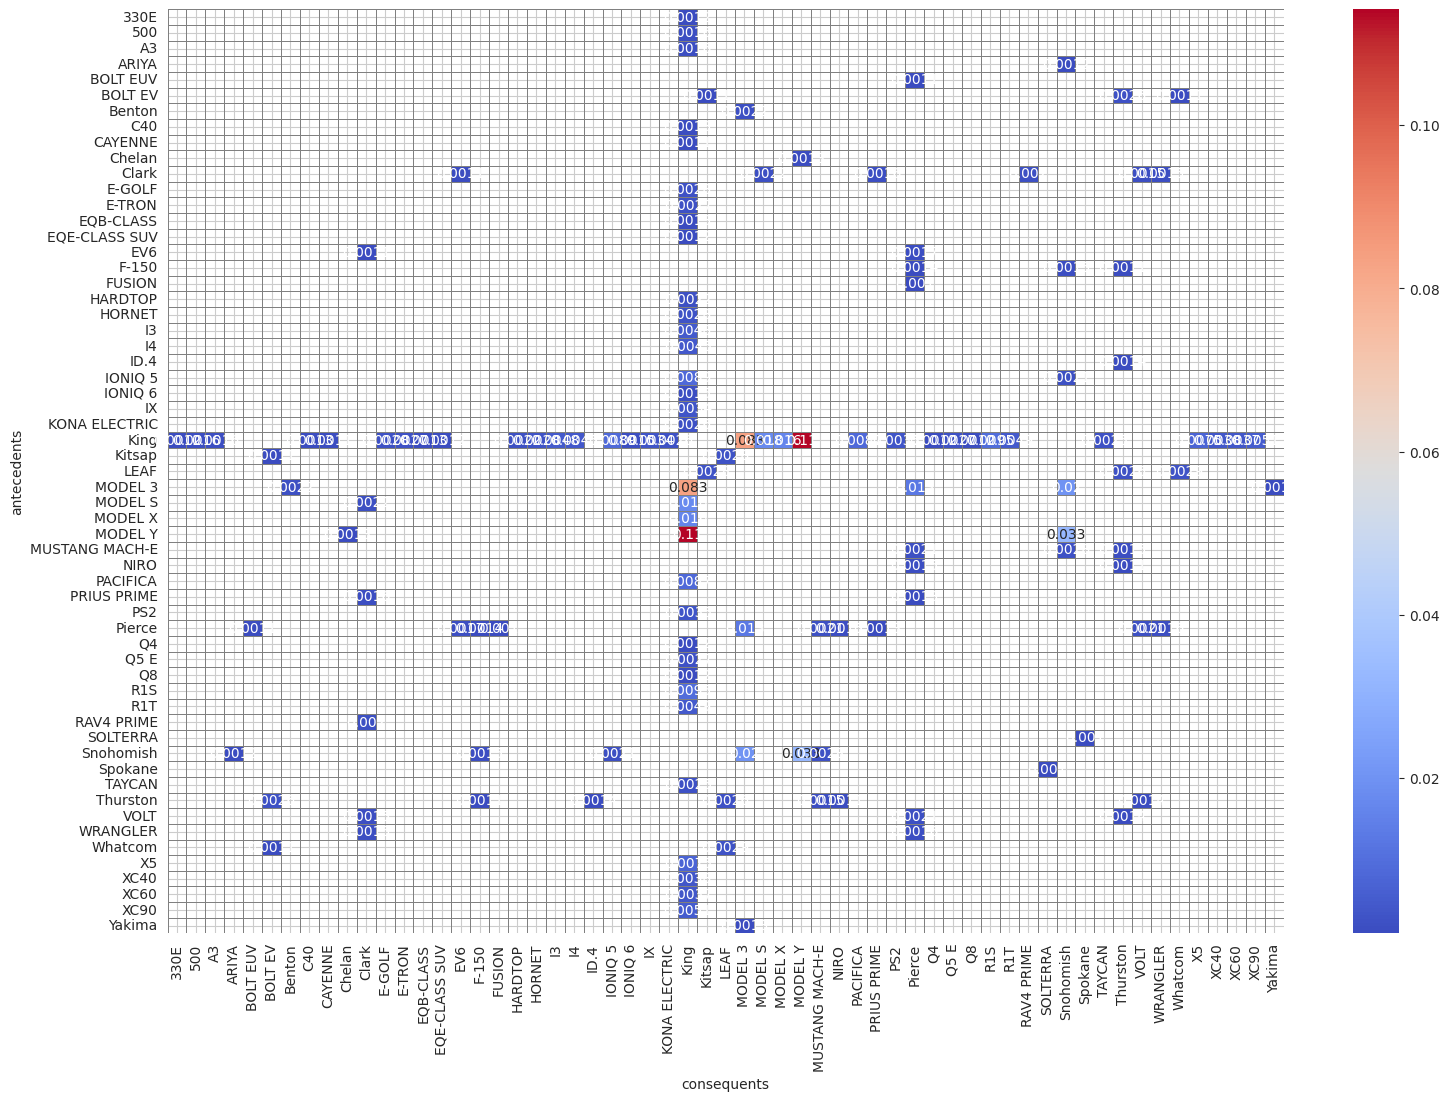

In [ ]:
support_table = rules_model_county.pivot(index='antecedents', columns='consequents',
values='support')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 12))
sns.heatmap(support_table, annot=True, linewidths=0.5, linecolor='gray', cmap='coolwarm')
plt.show()